In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import Ridge as Ridge_Reg
from sklearn.linear_model import Lasso as Lasso_Reg
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score,mean_absolute_error,explained_variance_score

df = pd.read_csv('Sandiego_Cleaned.csv')
#check out the rows and columns
df.shape

(1706708, 50)

In [29]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'neighbourhood_cleansed',
       'neighbourhood_cleansed.1', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'guests_included', 'extra_people',
       'minimum_nights_x', 'maximum_nights_x', 'availability_30',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'cancellation_policy', 'host_response_time',
       'host_response_rate', 'host_total_listings_count', 'available',
       'adjusted_price', 'minimum_nights_y', 'maximum_nights_y',
       'amenities_Wifi', 'amenities_Essentials', 'amenities_Smoke detector',
       'amenities_Kitchen', 'amenities_TV', 'amenities_Heating',
       'amenities_Hangers', 'amenities_Shampoo',
       'amenities_Carbon monoxide detector',

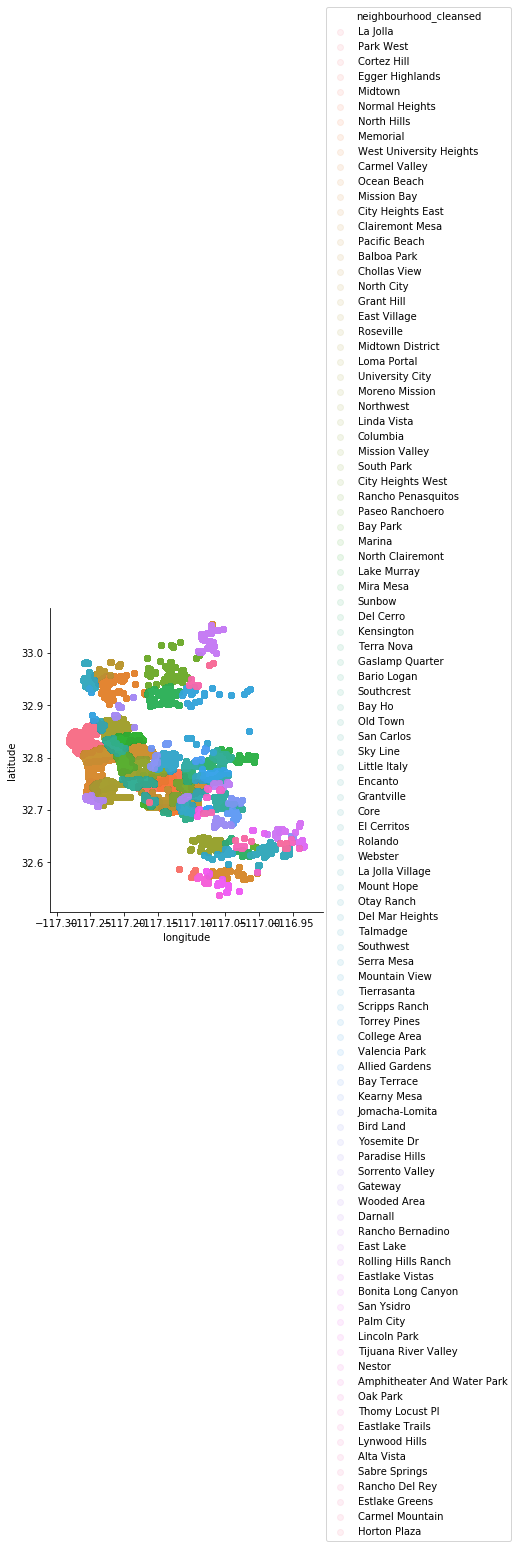

In [30]:
sns.lmplot(x='longitude', y='latitude', hue='neighbourhood_cleansed', 
            data=df, 
           fit_reg=False, scatter_kws={'alpha':0.1})

In [31]:
!pip install geopandas
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)         # adding points to plot
price_plot = gpd.GeoDataFrame(df, geometry=points)

In [32]:
A = df[['beds','bedrooms','bathrooms','accommodates']]
A.head()

,beds,bedrooms,bathrooms,accommodates
0,1.0,1.0,1.0,2
1,1.0,1.0,1.0,2
2,1.0,1.0,1.0,2
3,3.0,3.0,2.5,8
4,2.0,2.0,1.0,4


In [33]:
y = df['price'].astype('float64')
X_train, X_test, y_train, y_test = train_test_split(A, y, test_size = 0.25, random_state=1)

## Linear Regression

In [34]:
linearReg = linear_model.LinearRegression()
linearReg.fit(X_train, y_train)

predictions_linear = linearReg.predict(X_test) 
predictions_linear

array([696.27711752, 115.24141192,  76.79620404, ...,  61.8913934 ,
       106.60582533,  76.79620404])

In [35]:
print('Score:', linearReg.score(X_test, y_test))

Score: 0.3853282585246697


## Random Forest Regressor

In [36]:
randomForestReg =  RandomForestRegressor()
randomForestReg.fit(X_train, y_train)

predictions_random = randomForestReg.predict(X_test) 
predictions_random

array([450.        , 156.05399529,  86.34006737, ...,  56.2424581 ,
       135.3087798 ,  86.34006737])

In [37]:
print('Score:', randomForestReg.score(X_test, y_test))

Score: 0.6779039981742417


## Decision Tree Regressor

In [38]:
model_dt =  DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

predictions_dt = model_dt.predict(X_test) 
predictions_dt

array([450.        , 155.99802511,  86.34237439, ...,  56.21648459,
       135.3270942 ,  86.34237439])

In [39]:
print('Score:', model_dt.score(X_test, y_test))

Score: 0.677947119225165


## Gradient Boosting Regressor

In [40]:
gradientBoostingReg =  GradientBoostingRegressor()
gradientBoostingReg.fit(X_train, y_train)

predictions_gradient = gradientBoostingReg.predict(X_test) 
predictions_gradient

array([714.04145233, 162.57946577,  87.44420218, ...,  62.17306154,
       137.17776811,  87.44420218])

In [41]:
print('Score:', gradientBoostingReg.score(X_test, y_test))

Score: 0.5435724270677509


## XG Boost Regressor

In [42]:
model_xgb = XGBRegressor(n_estimators= 100, max_depth=20, min_samples_split=2,
          learning_rate= 0.5)

model_xgb.fit(X_train, y_train)
predictions_xgb = model_xgb.predict(X_test) 
predictions_xgb

/home/rajshree/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


array([450.00003 , 155.99802 ,  86.34237 , ...,  56.216484, 135.32709 ,
        86.34237 ], dtype=float32)

In [43]:
print('Score:', model_xgb.score(X_test, y_test))

Score: 0.6779471186986479


## Comparison of the performance of various models

In [46]:
Comparison = pd.DataFrame({
                           'Linear':[linearReg.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_linear,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_linear),np.sqrt(mean_squared_error(y_test, predictions_linear)),r2_score(y_test, predictions_linear),explained_variance_score (y_test, predictions_linear)],
                           'Random Forest':[randomForestReg.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_random,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_random),np.sqrt(mean_squared_error(y_test, predictions_random)),r2_score(y_test, predictions_random),explained_variance_score (y_test, predictions_random)],
                           'Decision Tree':[model_dt.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_dt,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_dt),np.sqrt(mean_squared_error(y_test, predictions_dt)),r2_score(y_test, predictions_dt),explained_variance_score (y_test, predictions_dt)],
                           'GradientB':[gradientBoostingReg.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_gradient,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_gradient),np.sqrt(mean_squared_error(y_test, predictions_gradient)),r2_score(y_test, predictions_gradient),explained_variance_score (y_test, predictions_gradient)],
                           'XGB':[model_xgb.score(X_test, y_test)*100,mean_squared_error(y_test, predictions_xgb,multioutput='uniform_average'),mean_absolute_error(y_test, predictions_xgb),np.sqrt(mean_squared_error(y_test, predictions_xgb)),r2_score(y_test, predictions_xgb),explained_variance_score (y_test, predictions_xgb)],
                                          })

Comparison.rename(index={0:'Accuracy' ,1:'MSE',2: 'MAE',3:'RMSE',4: 'R2-score'}, inplace=True)
Comparison.head()

,Linear,Random Forest,Decision Tree,GradientB,XGB
Accuracy,38.532826,67.790400,67.794712,54.357243,67.794712
MSE,46566.635472,24401.523760,24398.256972,34578.287847,24398.257012
MAE,85.853322,56.454776,56.457060,70.423191,56.457062
RMSE,215.793039,156.209871,156.199414,185.952381,156.199414
R2-score,0.385328,0.677904,0.677947,0.543572,0.677947


/home/rajshree/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Text(0.5,1,'Performance of Different Models')

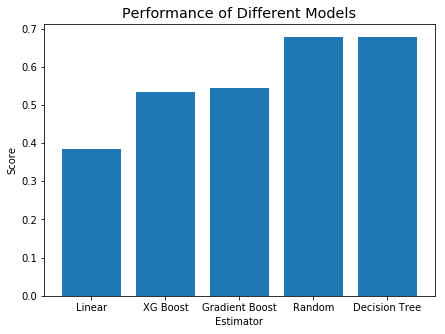

In [47]:
# the 6 models that we will compare 
ests = [ Lin_Reg(), RandomForestRegressor(),
        DecisionTreeRegressor(), GradientBoostingRegressor(), XGBRegressor()]
ests_labels = np.array(['Linear', 'Random', 'Decision Tree', 'Gradient Boost', 'XG Boost'])
errvals = np.array([])

# look at the median absolute error for each model
for e in ests:
    e.fit(X_train, y_train)
    prediction = e.predict(X_test)
    this_err = e.score(X_test,y_test)
    errvals = np.append(errvals, this_err)

# arrange models in terms of lowest to highest median error score
pos = np.arange(errvals.shape[0])
srt = np.argsort(errvals)
plt.figure(figsize=(7,5))
plt.bar(pos, errvals[srt], align='center')
plt.style.use('ggplot')
plt.xticks(pos, ests_labels[srt])
plt.xlabel('Estimator')
plt.ylabel('Score')
plt.title('Performance of Different Models')